In [ ]:
from ydata_profiling import ProfileReport

In [100]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

%matplotlib inline

In [5]:
df = pd.read_csv('ingredient.csv')
df.head()

a      b     c     d      e     f      g     h     i
0  1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.00  0.07
1  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.00  0.03
3  1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00
4  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00

In [8]:
profiling = ProfileReport(df)
display(profiling)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
X = df.values
X

array([[ 1.51735, 13.02   ,  3.54   , ...,  8.44   ,  0.     ,  0.07   ],
       [ 1.53125, 10.73   ,  0.     , ..., 13.3    ,  3.15   ,  0.28   ],
       [ 1.523  , 13.31   ,  3.58   , ..., 10.17   ,  0.     ,  0.03   ],
       ...,
       [ 1.51784, 12.68   ,  3.67   , ...,  8.7    ,  0.     ,  0.     ],
       [ 1.51841, 12.93   ,  3.74   , ...,  8.96   ,  0.     ,  0.22   ],
       [ 1.51321, 13.     ,  0.     , ...,  6.93   ,  0.     ,  0.     ]])

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

In [24]:
wcss

[1925.9999999999995,
 1526.8137002823619,
 1239.1028885477945,
 1036.5916901280477,
 891.2345220993745,
 766.7769435991411,
 682.9869074600674,
 612.4396770773118,
 558.1126152135905,
 528.2590099903265]

In [32]:
wcss = np.array(wcss)
derivatives = np.diff(wcss, 2)
derivatives_sign = np.sign(derivatives[1:] - derivatives[:-1])
optimal_clusters = np.argmax(derivatives_sign) + 2

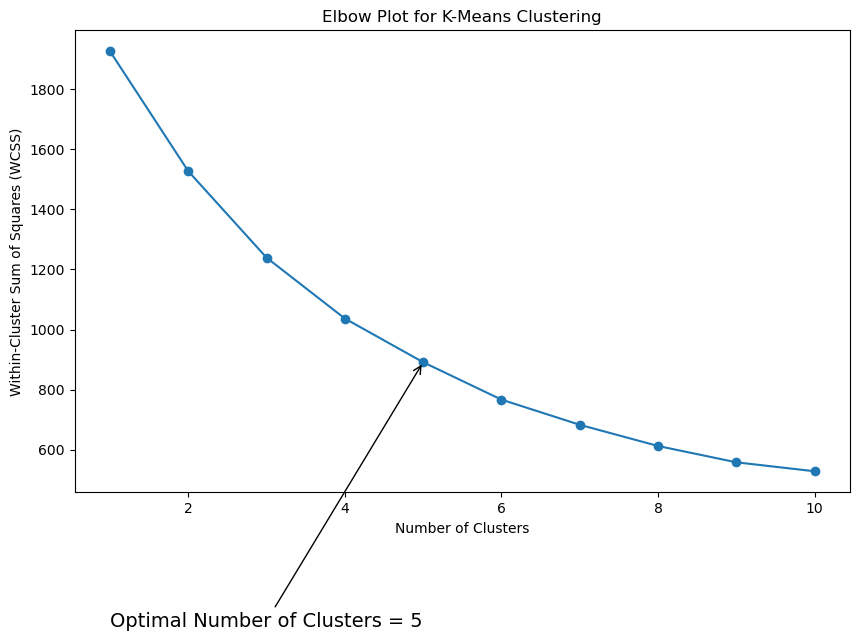

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot for K-Means Clustering')
plt.annotate('Optimal Number of Clusters = {}'.format(optimal_clusters),
             xy=(optimal_clusters, wcss[optimal_clusters-1]),
             xytext=(1, 10),
             arrowprops=dict(arrowstyle='->'),
             fontsize=14)

plt.show()

In [96]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [103]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init="auto", random_state=42)
kmeans.fit(X_pca)

kmeans_df = pd.DataFrame(X_pca)
kmeans_df.columns = ["PC 1", "PC 2"]
kmeans_df["Cluster"] =  kmeans.labels_
kmeans_df.head()

C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PC 1      PC 2  Cluster
0 -0.308817 -0.763162        1
1  3.640213  6.193445        4
2  2.251955  0.027974        0
3 -0.115094 -1.052939        1
4 -0.002301 -1.024473        1

In [104]:
sns.scatterplot(x=kmeans_df["PC 2"], y=kmeans_df["PC 1"], hue=kmeans_df["Cluster"], palette="flare")
plt.title("K-means Clustering Results")
plt.show()

# With the use of PCA 

In [63]:
X_1 = df[df.columns] = StandardScaler().fit_transform(df)

In [64]:
print(df.describe())

                a             b           c             d             e  \
count  214.000000  2.140000e+02  214.000000  2.140000e+02  2.140000e+02   
mean     0.000000 -7.263141e-18    0.000000 -8.300733e-18 -8.300733e-18   
std      1.002345  1.002345e+00    1.002345  1.002345e+00  1.002345e+00   
min     -2.381516 -3.286943e+00   -1.865511 -2.318616e+00 -3.676472e+00   
25%     -0.608273 -6.141580e-01   -0.395774 -5.117560e-01 -4.800288e-01   
50%     -0.226229 -1.323817e-01    0.552779 -1.704602e-01  1.799655e-01   
75%      0.261433  5.120326e-01    0.636168  3.715977e-01  5.649621e-01   
max      5.137232  4.875637e+00    1.254639  4.125851e+00  3.570524e+00   

                  f           g             h             i  
count  2.140000e+02  214.000000  2.140000e+02  2.140000e+02  
mean   4.150366e-18    0.000000  1.660147e-17  2.075183e-17  
std    1.002345e+00    1.002345  1.002345e+00  1.002345e+00  
min   -7.639186e-01   -2.484084 -3.528768e-01 -5.864509e-01  
25%   -5.75650

In [65]:
df_scaled = X_1

In [66]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))



Explained variation per principal component: [0.27901819 0.2277858 ]
Cumulative variance explained by 2 principal components: 50.68%


In [72]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)




              a         b         c         d         e         f         g  \
PC_1  0.545177  0.258126  0.110881  0.428709  0.228836  0.219344  0.492306   
PC_2  0.285683  0.270350  0.593558  0.295212  0.155099  0.153970  0.345380   

             h         i  
PC_1  0.250375  0.185842  
PC_2  0.484702  0.062039  


In [73]:
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())

As per PC 1:
 a    0.545177
d    0.428709
g    0.492306
Name: PC_1, dtype: float64


As per PC 2:
 c    0.593558
g    0.345380
h    0.484702
Name: PC_2, dtype: float64


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameter: {'n_clusters': 2} Score 0.40388984687617285
Parameter: {'n_clusters': 3} Score 0.4431296140594232


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameter: {'n_clusters': 4} Score 0.3095063852856175
Parameter: {'n_clusters': 5} Score 0.3270464873914768


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameter: {'n_clusters': 10} Score 0.2987775038163175


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameter: {'n_clusters': 15} Score 0.34374250160484954
Parameter: {'n_clusters': 20} Score 0.21433730893807754


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameter: {'n_clusters': 25} Score 0.22711324705820718
Parameter: {'n_clusters': 30} Score 0.24439995490072652


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameter: {'n_clusters': 35} Score 0.24831646680937106


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameter: {'n_clusters': 40} Score 0.24068738483888089


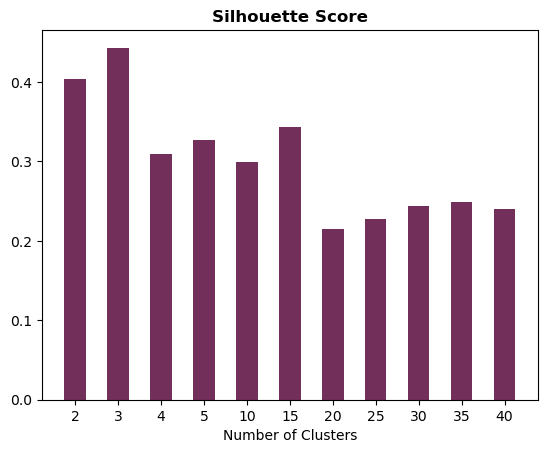

In [87]:
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(df_scaled)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(df_scaled, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [94]:
best_n_clusters = 3  

kmeans_model.set_params(n_clusters=best_n_clusters)
kmeans_model.fit(df_scaled)  

# Get the cluster labels
cluster_labels = kmeans_model.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering (K=3)', fontweight='bold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


C:\Users\looi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#reference 
https://medium.com/data-folks-indonesia/step-by-step-to-understanding-k-means-clustering-and-implementation-with-sklearn-b55803f519d6
https://medium.com/analytics-vidhya/everything-you-need-to-know-about-k-means-clustering-88ad4058cce0
https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240
https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study#4.-K-Means